# KNN 회귀 기본 코드

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
!pip uninstall -y hossam
!pip install --upgrade git+https://github.com/leekh4232/hossam-data-helper.git

Found existing installation: hossam 0.1.1
Uninstalling hossam-0.1.1:
  Successfully uninstalled hossam-0.1.1
  Cloning https://github.com/leekh4232/hossam-data-helper.git to c:\users\public\documents\estsoft\creatortemp\pip-req-build-fb7ydm0n
  Resolved https://github.com/leekh4232/hossam-data-helper.git to commit 9375a4e68d8a2b61dc4c23ae7fc3060c832fce14
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for hossam: filename=hossam-0.1.1-py3-none-any.whl size=40415 sha256=2cbfcec99526baacd3f6d8b44d4eb3cce4ee13928ffac2a7b7b81d7d44cd77ba
  Stored in directory: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-ephem-wheel-cache-lweij0qx\wheels\06\39\91\c9a9ffd0cc241187643765548752602d8b13b8c98e6a0a2cd5
Successfully built hossam


  Running command git clone --filter=blob:none --quiet https://github.com/leekh4232/hossam-data-helper.git 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-req-build-fb7ydm0n'
DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

from sklearn.neighbors import KNeighborsRegressor

### [2] 데이터 가져오기

In [4]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None

데이터프레임 상위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+

데이터프레임 하위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
| 51 |     42 |   12.8 |   6.87 |   1100 |
| 52 |     43 |  11.93 |   7.28 |   1000 |
| 53 |     43

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리 + 스케일링

In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 3), (12, 3), (44,), (12,))

## #03. KNN 회귀분석

### [1] 예측 모델 구현

| 파라미터 | 타입 | 설명 | 기본값 |
|---|---|---|---|
| n_neighbors | `int` | $k$값 | `5` |
| weights | `str` | 가중치 적용 여부<br/>-`uniform`: 가중치 사용 안함<br/> -`distance`: 거리의 역수 만큼 가중치 부여 | `uniform` |
| p | `int` | `1` - 맨하탄 거리 측정<br/>`2` - 유클리디안 거리 측정 | `2` |

In [6]:
estimator = KNeighborsRegressor(
                n_neighbors=5, 
                weights='uniform', 
                p=2,
                n_jobs=-1)
estimator.fit(x_train, y_train)

KNeighborsRegressor(n_jobs=-1)

### [2] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.982478 |     0.986901 |
| 평균절대오차(MAE)             |      29.6423 |         27.8 |
| 평균제곱오차(MSE)             |      2060.57 |      1545.59 |
| 평균오차(RMSE)                |      45.3935 |       39.314 |
| 평균 절대 백분오차 비율(MAPE) |      22.2748 |      6.20356 |
| 평균 비율 오차(MPE)           |     -14.4093 |    -0.875183 |
+-------------------------------+--------------+--------------+

[학습곡선]


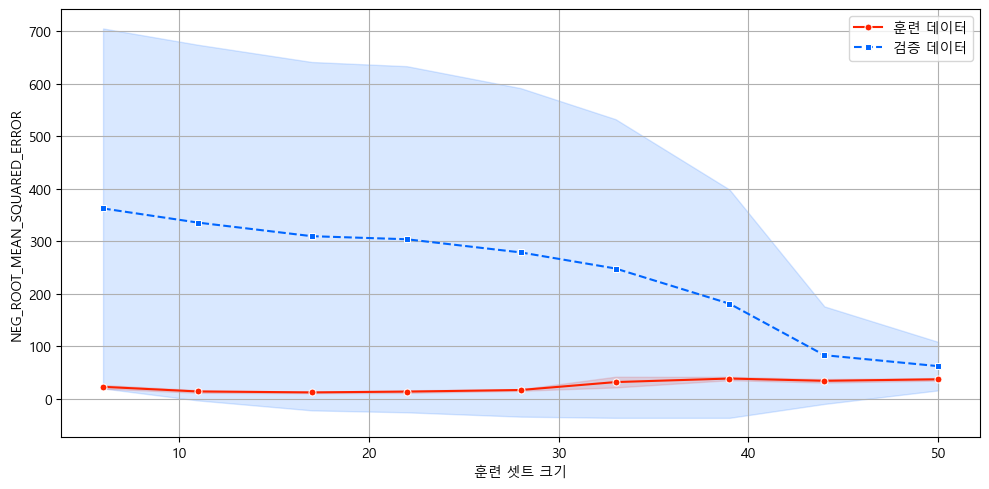

In [7]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

## #04. 2차항 생성 후 분석 수행

### [1] 2차항 생성

In [8]:
df = my_poly_features(origin, ignore=['무게'])
my_pretty_table(df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |   무게 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |   187.69 |      48.361 |        27.4 |  12.4609 |        7.06 |        4 |     32 |
|  2 |     15 |   3.82 |   2.43 |      225 |        57.3 |       36.45 |  14.5924 |      9.2826 |   5.9049 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   262.44 |      74.358 |      42.606 |  21.0681 |     12.0717 |   6.9169 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |   302.76 |      79.866 |      51.156 |  21.0681 |     13.4946 |   8.6436 |     70 |
+----+--------+--------+--------+----------+-------------+-------------+----------

### [2] 훈련, 검증 데이터 분리 + 스케일링

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 9), (12, 9), (44,), (12,))

### [3] 예측 모델 구현

### [4] 성능평가

In [10]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 길이 높이
- 길이 두께
- 길이^2
- 높이 두께
- 높이^2
- ...


## #04. 모듈화 기능 확인

### [1] KNN 회귀 

In [ ]:
my_knn_regression(x_train, y_train, x_test, y_test)

### [2] 지금까지의 모든 예측 모형 비교

In [ ]:
#my_regression(x_train, y_train, x_test, y_test)